In [3]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
y=pd.read_csv('InteractionYield.csv')
y

,yieldAB,temp,catalyst,catalyst2,catalyst3,catalyst3ABorC
0,56,21,A,1.0,1,AB
1,55,28,A,1.0,1,AB
2,63,33,A,1.0,1,AB
3,52,33,A,1.0,1,AB
4,58,38,A,1.0,1,AB
5,65,43,A,1.0,1,AB
6,64,48,A,1.0,1,AB
7,61,53,A,1.0,1,AB
8,69,53,A,1.0,1,AB
9,73,58,A,1.0,1,AB


<AxesSubplot:xlabel='temp', ylabel='yieldAB'>

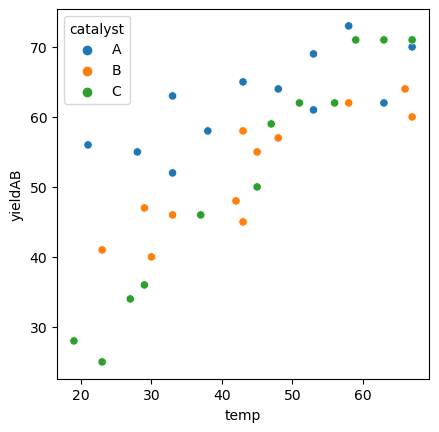

In [6]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.scatterplot(x="temp", y="yieldAB",hue="catalyst",data=y)

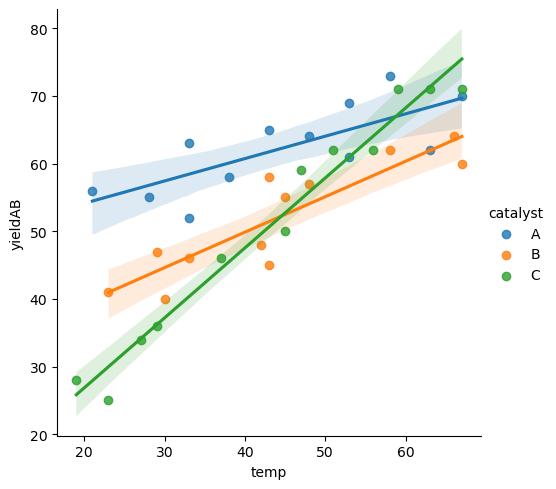

In [7]:
sns.lmplot(x="temp", y="yieldAB",hue="catalyst",data=y)

In [8]:
barA=y['catalyst'].value_counts()
barA=pd.DataFrame(barA)
barA

,catalyst
A,12
B,12
C,12


In [9]:
pd.get_dummies(y.catalyst.values, drop_first=False)

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [10]:
#fit predictor to the model: 
model1=ols('yieldAB~temp',data=y)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.624   
Dependent Variable: yieldAB          AIC:                250.2557
Date:               2023-06-26 16:07 BIC:                253.4227
No. Observations:   36               Log-Likelihood:     -123.13 
Df Model:           1                F-statistic:        59.08   
Df Residuals:       34               Prob (F-statistic): 6.15e-09
R-squared:          0.635            Scale:              57.958  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      25.3393    4.0826  6.2067  0.0000  17.0426  33.6361
temp            0.6762    0.0880  7.6867  0.0000   0.4974   0.8550
-----------------------------------------------------------------
Omnibus:              0.286        Durbin-Watson:           0.894
Prob(Omnibus):        

In [11]:
#fit another predictor to the model: multiple variable regression with categorical predictor 
model4=ols('yieldAB~temp+C(catalyst,Treatment(reference="C"))',data=y)
results4=model4.fit()
print(results4.summary2())

                             Results: Ordinary least squares
Model:                      OLS                      Adj. R-squared:             0.764   
Dependent Variable:         yieldAB                  AIC:                        235.3518
Date:                       2023-06-26 16:07         BIC:                        241.6859
No. Observations:           36                       Log-Likelihood:             -113.68 
Df Model:                   3                        F-statistic:                38.71   
Df Residuals:               32                       Prob (F-statistic):         9.29e-11
R-squared:                  0.784                    Scale:                      36.424  
-----------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------------------
Intercept                              

In [12]:
#fit another predictor to the model: multiple variable regression with categorical predictor and significant interaction effect
model5=ols('yieldAB~temp+C(catalyst,Treatment(reference="C"))+temp*C(catalyst,Treatment(reference="C"))',data=y)
results5=model5.fit()
print(results5.summary2())

                                Results: Ordinary least squares
Model:                        OLS                        Adj. R-squared:               0.900   
Dependent Variable:           yieldAB                    AIC:                          206.0487
Date:                         2023-06-26 16:07           BIC:                          215.5499
No. Observations:             36                         Log-Likelihood:               -97.024 
Df Model:                     5                          F-statistic:                  64.04   
Df Residuals:                 30                         Prob (F-statistic):           4.26e-15
R-squared:                    0.914                      Scale:                        15.405  
-----------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------

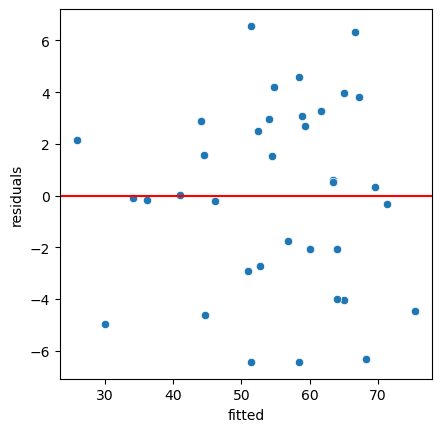

In [13]:
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.scatterplot(x=results5.fittedvalues.values, y=results5.resid)
plt.xlabel("fitted")
plt.ylabel("residuals")
plt.axhline(y=0,color="red")

eval_env: 1


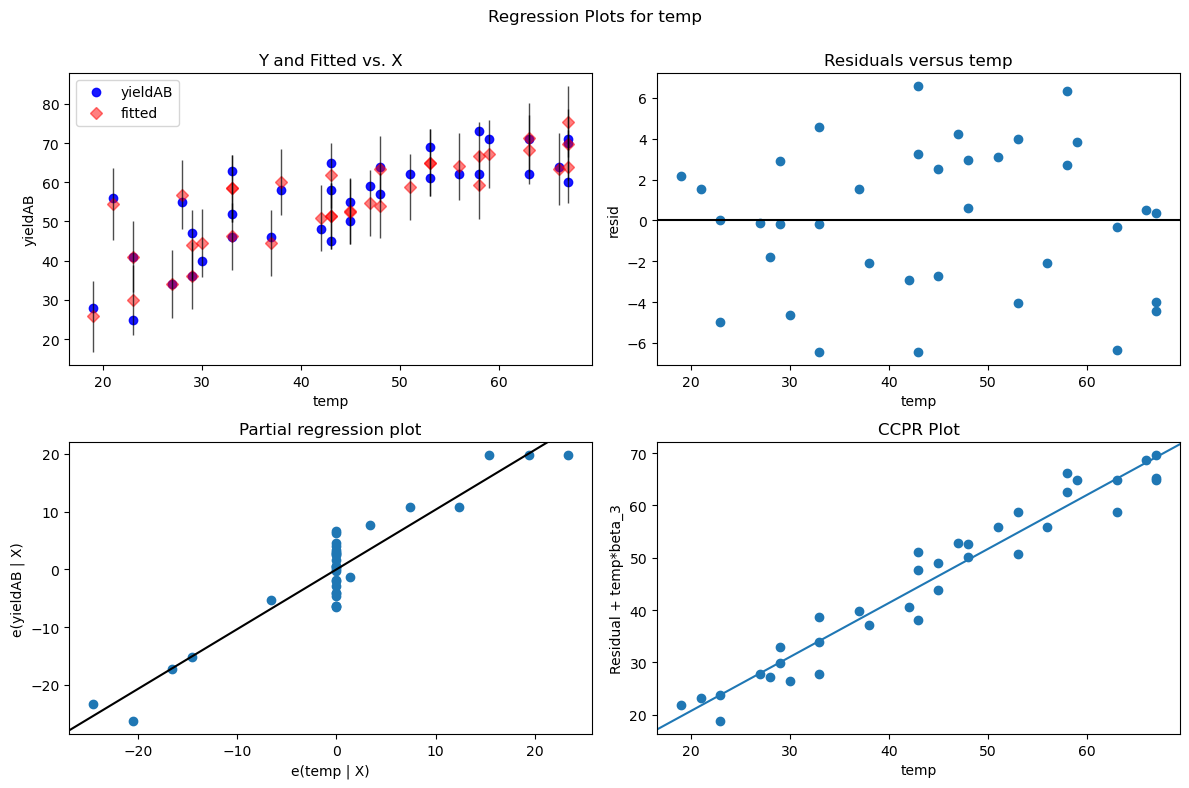

In [14]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results5,'temp',fig=fig)

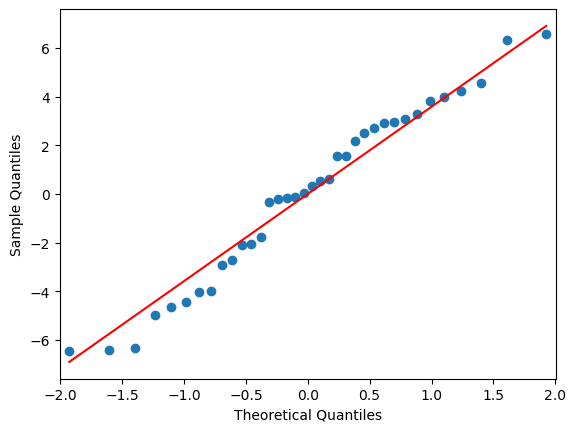

In [15]:
sm.qqplot(results5.resid,line='s')
plt.show()

In [16]:
#y

In [17]:
#fit another predictor to the model: multiple variable regression with categorical predictor and significant interaction effect
# using A/B=1 versus C=0
model6=ols('yieldAB~temp+C(catalyst3ABorC,Treatment(reference="C"))',data=y)
results6=model6.fit()
print(results6.summary2())

                                Results: Ordinary least squares
Model:                         OLS                        Adj. R-squared:               0.657   
Dependent Variable:            yieldAB                    AIC:                          247.8239
Date:                          2023-06-26 16:07           BIC:                          252.5744
No. Observations:              36                         Log-Likelihood:               -120.91 
Df Model:                      2                          F-statistic:                  34.59   
Df Residuals:                  33                         Prob (F-statistic):           7.96e-09
R-squared:                     0.677                      Scale:                        52.797  
------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
---------------------------------------------------------------

In [18]:
#fit another predictor to the model: multiple variable regression with categorical predictor and significant interaction effect
# using A/B=1 versus C=0
model7=ols('yieldAB~temp*C(catalyst3ABorC,Treatment(reference="C"))',data=y)
results7=model7.fit()
print(results7.summary2())

                                   Results: Ordinary least squares
Model:                           OLS                          Adj. R-squared:                 0.776   
Dependent Variable:              yieldAB                      AIC:                            233.4966
Date:                            2023-06-26 16:07             BIC:                            239.8306
No. Observations:                36                           Log-Likelihood:                 -112.75 
Df Model:                        3                            F-statistic:                    41.32   
Df Residuals:                    32                           Prob (F-statistic):             4.10e-11
R-squared:                       0.795                        Scale:                          34.595  
------------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------

In [19]:
#y

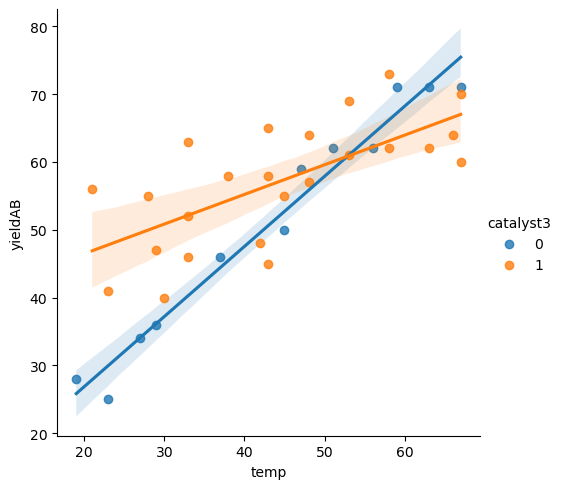

In [20]:
sns.lmplot(x="temp", y="yieldAB",hue="catalyst3",data=y)

In [21]:
#fit another predictor to the model: multiple variable regression with categorical predictor and significant interaction effect
# using A/B=1 versus C=0
model8=ols('yieldAB~temp*catalyst3',data=y)
results8=model8.fit()
print(results8.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.776   
Dependent Variable: yieldAB          AIC:                233.4966
Date:               2023-06-26 16:07 BIC:                239.8306
No. Observations:   36               Log-Likelihood:     -112.75 
Df Model:           3                F-statistic:        41.32   
Df Residuals:       32               Prob (F-statistic): 4.10e-11
R-squared:          0.795            Scale:              34.595  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          6.2114   5.0196  1.2374 0.2249 -4.0133 16.4361
temp               1.0334   0.1084  9.5345 0.0000  0.8126  1.2542
catalyst3         31.5212   6.4532  4.8845 0.0000 18.3763 44.6660
temp:catalyst3    -0.5964   0.1392 -4.2853 0.0002 -0.8799 -0.3129
---------------------------

In [22]:
model8.exog_names[1:]

['temp', 'catalyst3', 'temp:catalyst3']

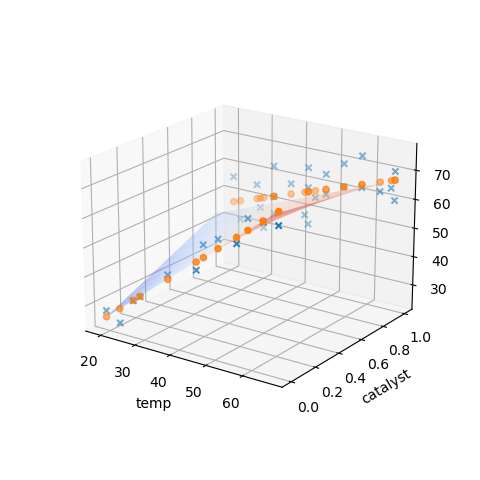

In [23]:
plt.clf()
%matplotlib widget
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111,projection='3d')

xyield=y["temp"]
yyield=y['catalyst3']
zyield=y['yieldAB']
plt.xlabel("temp")
plt.ylabel("catalyst")

ax.scatter(xyield,yyield,zyield,marker='x',label="Raw Data")
ax.view_init(elev=20.,azim=305)

ax.scatter(xyield.values,yyield.values,results8.fittedvalues.values)

xyieldA,cyieldB,xcyield=model8.exog_names[1:]

x_surf=np.arange(y['temp'].min(), y['temp'].max())
y_surf=np.arange(y['catalyst3'].min(), y['catalyst3'].max(),.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({xyieldA: xS.ravel(), cyieldB:yS.ravel(),xcyield:xcyield})
zS=results8.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')